In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('013 IndexE8.csv')
df_comp=df.copy()
df.date=pd.to_datetime(df.date,dayfirst=True)
df.set_index('date',inplace=True)

In [4]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [5]:
df=df.resample('B').mean()

In [6]:
df.spx=df.spx.fillna(method='ffill')

df=df.fillna(method='bfill')

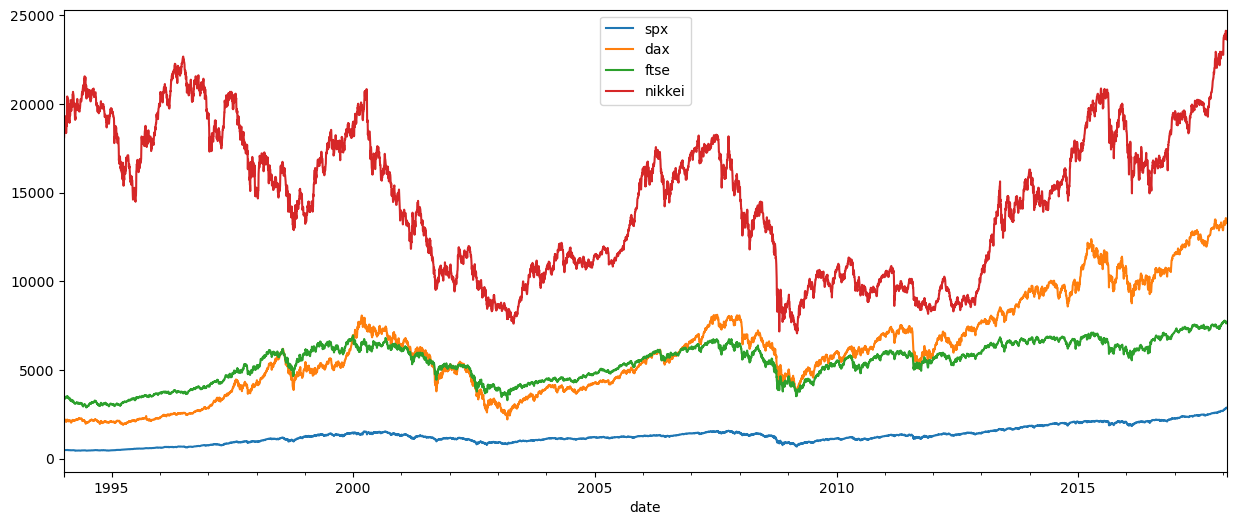

In [7]:
df.plot(figsize=(15,6))

plt.show()

In [20]:
import statsmodels.tsa.stattools as sts

In [7]:
sts.adfuller(df.nikkei)

(-1.3319540100987555,
 0.6144295206715376,
 1,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 83856.68876913635)

In [8]:
del  df['dax'] , df['nikkei'],df['spx']

In [8]:
df

,ftse
date,
1994-01-07,3445.980000
1994-01-10,3440.580000
1994-01-11,3413.770000
1994-01-12,3372.020000
1994-01-13,3360.010000
...,...
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954


In [10]:
#stationary or not

In [11]:
sts.adfuller(df.ftse)

(-1.5988336219620516,
 0.48417935790446065,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68477.33735716512)

In [76]:
df.ftse

date
1994-01-07    3445.980000
1994-01-10    3440.580000
1994-01-11    3413.770000
1994-01-12    3372.020000
1994-01-13    3360.010000
                 ...     
2018-01-23    7731.827774
2018-01-24    7643.428966
2018-01-25    7615.839954
2018-01-26    7665.541292
2018-01-29    7671.533300
Freq: B, Name: ftse, Length: 6277, dtype: float64

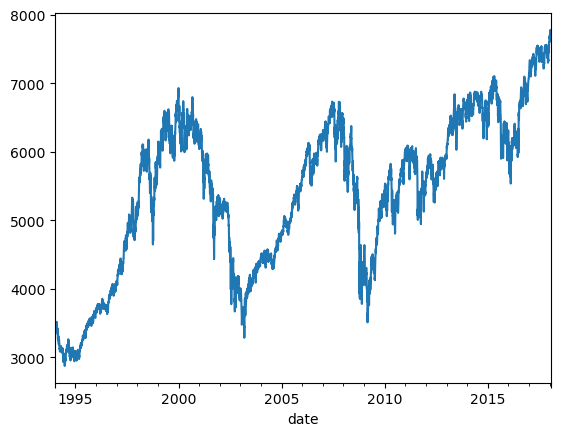

In [12]:
df.ftse.plot()
plt.show()

In [9]:
#seasonal or not

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

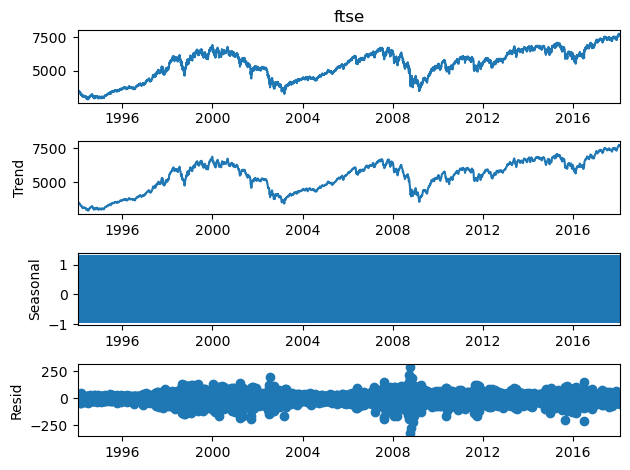

In [25]:
s_dec_add = seasonal_decompose(df.ftse,model='additive')

s_dec_add.plot()

plt.show()

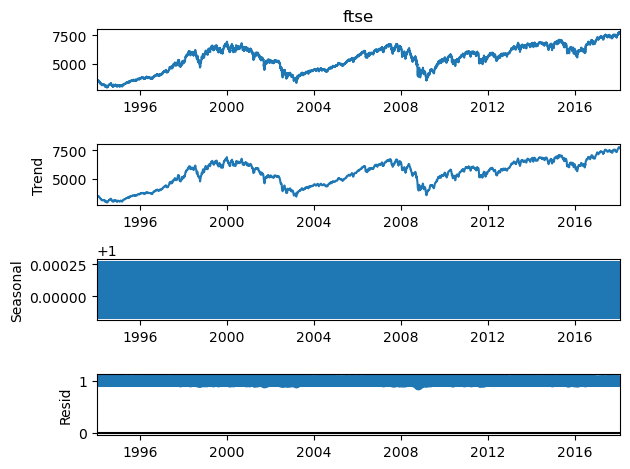

In [26]:
s_dec_add = seasonal_decompose(df.ftse,model='multiplicative')

s_dec_add.plot()

plt.show()

In [14]:
import statsmodels.graphics.tsaplots as sgt

In [9]:
#method 1:differencing

def difference(dataset,interval=1):
  diff=list()
  for i in range(interval,len(dataset)):
    value=dataset[i]-dataset[i-interval]
    diff.append(value)
  return diff

In [10]:
ftse_diff=difference(df.ftse)

In [11]:
df=df.iloc[1:,:]

In [12]:
df['ftse_diff']=ftse_diff

<ipython-input-12-35830011e12b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ftse_diff']=ftse_diff


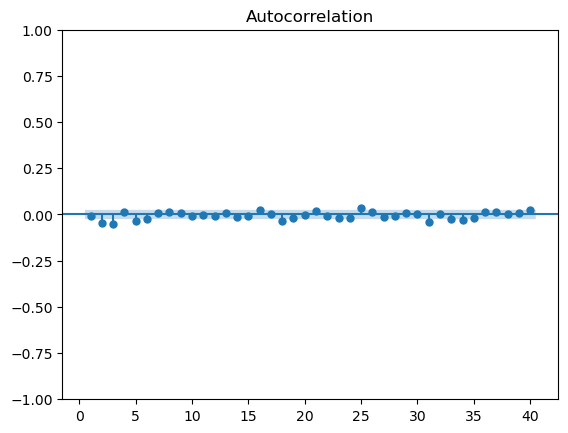

In [15]:
sgt.plot_acf(df.ftse_diff,lags=40,zero=False)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


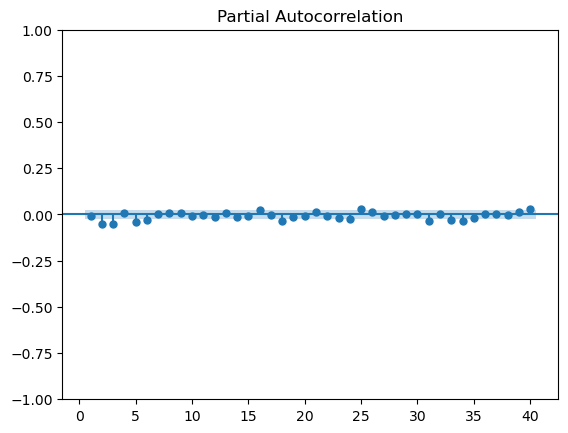

In [17]:
sgt.plot_pacf(df.ftse_diff,lags=40,zero=False)

plt.show()

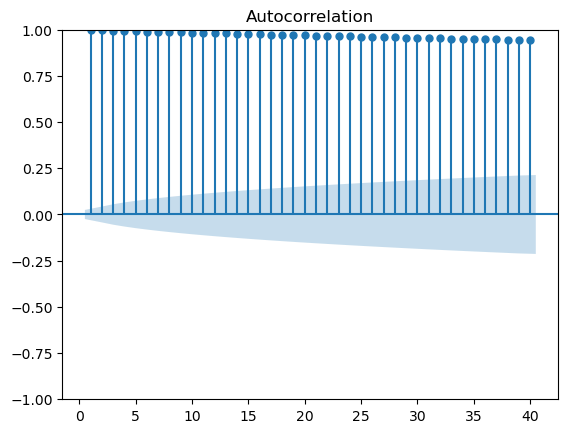

In [16]:
sgt.plot_acf(df.ftse,lags=40,zero=False)

plt.show()

In [18]:
df

,ftse,ftse_diff
date,,
1994-01-10,3440.580000,-5.400000
1994-01-11,3413.770000,-26.810000
1994-01-12,3372.020000,-41.750000
1994-01-13,3360.010000,-12.010000
1994-01-14,3400.560000,40.550000
...,...,...
2018-01-23,7731.827774,16.386240
2018-01-24,7643.428966,-88.398808
2018-01-25,7615.839954,-27.589012


In [21]:
sts.adfuller(df.ftse_diff)

(-35.599732342192624,
 0.0,
 5,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68468.13611640701)

In [22]:
#train test split
size= int(len(df)*0.8)
train_data=df.iloc[:size,:]
test_data=df.iloc[size:,:]

In [23]:
print(train_data.shape)

print(test_data.shape)

(5020, 2)
(1256, 2)


In [136]:
train_data

,ftse,ftse_diff
date,,
1994-01-11,3413.77,-26.81
1994-01-12,3372.02,-41.75
1994-01-13,3360.01,-12.01
1994-01-14,3400.56,40.55
1994-01-17,3407.83,7.27
...,...,...
2013-04-02,6490.66,78.92
2013-04-03,6420.28,-70.38
2013-04-04,6344.11,-76.17


In [143]:
#method 2:moving average

def difference(dataset):
    mg=list()
    print(len(dataset))
    for i in range(2,len(dataset)):
        
        m=(dataset[i]+dataset[i-1]+dataset[i-2])/3
              
             
        mg.append((dataset[i]-m))
        
    return mg

In [137]:
df.ftse

date
1994-01-11    3413.770000
1994-01-12    3372.020000
1994-01-13    3360.010000
1994-01-14    3400.560000
1994-01-17    3407.830000
                 ...     
2018-01-23    7731.827774
2018-01-24    7643.428966
2018-01-25    7615.839954
2018-01-26    7665.541292
2018-01-29    7671.533300
Freq: B, Name: ftse, Length: 6275, dtype: float64

In [144]:
df_mg=difference(df.ftse)

6275


In [145]:
df_mg

[-21.92333333333363,
 23.029999999999745,
 18.36333333333323,
 21.876666666667006,
 35.15333333333365,
 9.273333333333085,
 7.7599999999997635,
 2.880000000000564,
 -25.896666666666533,
 -17.74333333333334,
 -8.516666666666424,
 10.52333333333354,
 36.320000000000164,
 7.886666666666315,
 22.413333333333412,
 -6.2599999999997635,
 -20.289999999999964,
 -42.92666666666628,
 -4.7033333333338305,
 -0.3499999999994543,
 -18.4699999999998,
 -26.106666666667024,
 -19.586666666666133,
 14.639999999999418,
 26.25666666666666,
 13.236666666666679,
 -25.943333333333157,
 -35.79333333333307,
 -21.78666666666686,
 -0.09666666666680612,
 -46.89666666666653,
 -15.640000000000327,
 35.84666666666726,
 -22.699999999999818,
 -34.17333333333363,
 -8.563333333333503,
 20.4699999999998,
 29.10666666666657,
 -18.36999999999989,
 -25.63666666666677,
 -14.433333333333394,
 -32.266666666666424,
 13.666666666666515,
 36.5,
 -5.0,
 0.3666666666663332,
 -20.799999999999727,
 -25.94666666666626,
 -4.3466666666668

In [146]:
sts.adfuller(df_mg)

(-36.48956123091278,
 0.0,
 4,
 6268,
 {'1%': -3.4313937109235875,
  '5%': -2.862001227905827,
  '10%': -2.5670155086390123},
 63377.34321222274)

### modeling:statistical model:linear

#### AR model: select optimized model

In [24]:
import statsmodels.api as sm

In [25]:
model_ar=sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(1,0,0))
result_ar=model_ar.fit()
result_ar.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27614.899
Date:                Sat, 28 Jan 2023   AIC                          55235.798
Time:                        14:57:24   BIC                          55255.361
Sample:                    01-10-1994   HQIC                         55242.653
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5585      0.836      0.668      0.504      -1.079       2.196
ar.L1         -0.0180      0.010     -1.834      0.067      -0.037       0.001
sigma2      3513.1623     40.890     85.918      0.000    3433.020    3593.305
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3326.99
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
model_ar=sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(2,0,0))
result_ar=model_ar.fit()
result_ar.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27608.453
Date:                Sun, 22 Jan 2023   AIC                          55224.907
Time:                        15:41:13   BIC                          55250.991
Sample:                    01-10-1994   HQIC                         55234.047
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5585      0.804      0.695      0.487      -1.018       2.135
ar.L1         -0.0190      0.010     -1.912      0.056      -0.038       0.000
ar.L2         -0.0506      0.009     -5.551      0.000      -0.069      -0.033
sigma2      3504.6957     40.876     85.740      0.000    3424.580    3584.811
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3334.30
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

optimizeModel for less BIC 

In [25]:
model_ar=sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(3,0,0))
result_ar=model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27595.886
Date:                Mon, 23 Jan 2023   AIC                          55201.773
Time:                        15:21:53   BIC                          55234.379
Sample:                    01-10-1994   HQIC                         55213.198
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5585      0.762      0.733      0.463      -0.934       2.051
ar.L1         -0.0225      0.010     -2.250      0.024      -0.042      -0.003
ar.L2         -0.0520      0.009     -5.728      0.000      -0.070      -0.034
ar.L3         -0.0707      0.009     -7.762      0.000      -0.089      -0.053
sigma2      3487.5076     41.997     83.041      0.000    3405.194    3569.821
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3088.35
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
resid=result_ar.resid

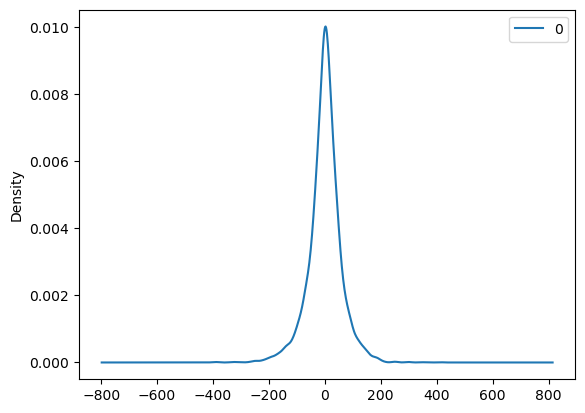

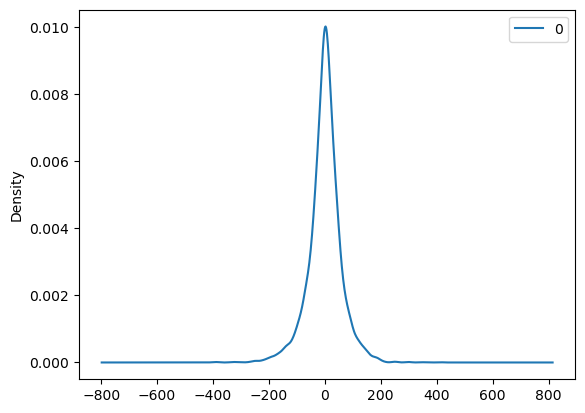

In [29]:
re=pd.DataFrame(resid)

re.plot(kind='kde')
plt.show()
        

In [42]:
model_ar=sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(4,0,0))
result_ar=model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27594.053
Date:                Sun, 22 Jan 2023   AIC                          55200.106
Time:                        15:39:55   BIC                          55239.233
Sample:                    01-10-1994   HQIC                         55213.816
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5585      0.786      0.710      0.477      -0.982       2.099
ar.L1         -0.0206      0.010     -2.055      0.040      -0.040      -0.001
ar.L2         -0.0506      0.009     -5.546      0.000      -0.068      -0.033
ar.L3         -0.0701      0.009     -7.688      0.000      -0.088      -0.052
ar.L4          0.0270      0.009      3.007      0.003       0.009       0.045
sigma2      3485.6058     42.310     82.382      0.000    3402.679    3568.533
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3014.08
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARMA model

In [47]:
model_arma=sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(3,0,1))
result_arma=model_arma.fit()
result_arma.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -27593.140
Date:                Sun, 22 Jan 2023   AIC                          55198.280
Time:                        15:46:13   BIC                          55237.407
Sample:                    01-10-1994   HQIC                         55211.990
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5596      0.775      0.722      0.470      -0.958       2.078
ar.L1         -0.4081      0.095     -4.284      0.000      -0.595      -0.221
ar.L2         -0.0594      0.010     -5.764      0.000      -0.080      -0.039
ar.L3         -0.0915      0.009     -9.664      0.000      -0.110      -0.073
ma.L1          0.3878      0.096      4.040      0.000       0.200       0.576
sigma2      3487.5866     42.329     82.392      0.000    3404.623    3570.550
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3011.08
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### best model

In [26]:
model_arma32=sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(3,0,2))
result_arma32=model_arma32.fit()
result_arma32.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -27591.921
Date:                Sat, 28 Jan 2023   AIC                          55197.842
Time:                        14:57:57   BIC                          55243.490
Sample:                    01-10-1994   HQIC                         55213.838
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5618      0.795      0.707      0.480      -0.996       2.119
ar.L1         -0.5666      0.080     -7.099      0.000      -0.723      -0.410
ar.L2         -0.4406      0.088     -5.002      0.000      -0.613      -0.268
ar.L3         -0.0938      0.010     -9.411      0.000      -0.113      -0.074
ma.L1          0.5483      0.080      6.818      0.000       0.391       0.706
ma.L2          0.3844      0.089      4.328      0.000       0.210       0.558
sigma2      3483.3519     42.358     82.235      0.000    3400.331    3566.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2997.55
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

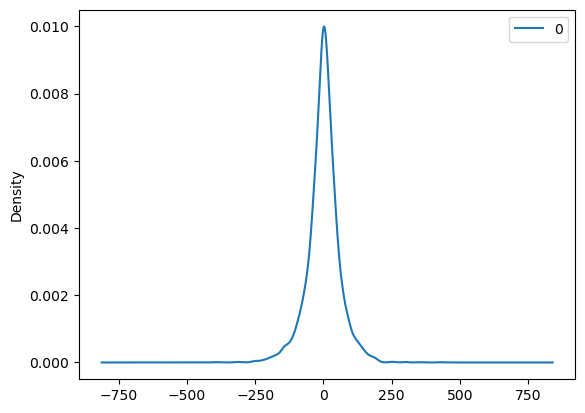

In [27]:
resid=result_arma32.resid

res=pd.DataFrame(resid)

res.plot(kind='kde')

plt.show()

In [49]:
model_arma41=sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(4,0,1))
result_arma41=model_arma41.fit()
result_arma41.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(4, 0, 1)   Log Likelihood              -27593.059
Date:                Sun, 22 Jan 2023   AIC                          55200.119
Time:                        15:48:50   BIC                          55245.767
Sample:                    01-10-1994   HQIC                         55216.114
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5596      0.785      0.713      0.476      -0.979       2.098
ar.L1         -0.3367      0.245     -1.373      0.170      -0.817       0.144
ar.L2         -0.0575      0.011     -5.086      0.000      -0.080      -0.035
ar.L3         -0.0864      0.016     -5.473      0.000      -0.117      -0.055
ar.L4          0.0095      0.022      0.425      0.671      -0.034       0.053
ma.L1          0.3167      0.247      1.284      0.199      -0.167       0.800
sigma2      3485.1098     42.333     82.326      0.000    3402.138    3568.081
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3004.51
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
model_arma62=sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(6,0,2))
result_arma62=model_arma62.fit()
result_arma62.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(6, 0, 2)   Log Likelihood              -27584.554
Date:                Mon, 23 Jan 2023   AIC                          55189.109
Time:                        15:29:15   BIC                          55254.321
Sample:                    01-10-1994   HQIC                         55211.960
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5641      0.748      0.754      0.451      -0.902       2.030
ar.L1          0.1481      0.204      0.728      0.467      -0.251       0.547
ar.L2         -0.4243      0.154     -2.751      0.006      -0.727      -0.122
ar.L3         -0.0738      0.015     -5.041      0.000      -0.103      -0.045
ar.L4          0.0171      0.015      1.144      0.252      -0.012       0.046
ar.L5         -0.0713      0.017     -4.125      0.000      -0.105      -0.037
ar.L6         -0.0256      0.017     -1.470      0.142      -0.060       0.009
ma.L1         -0.1692      0.202     -0.836      0.403      -0.566       0.228
ma.L2          0.3767      0.157      2.404      0.016       0.070       0.684
sigma2      3471.0696     42.412     81.842      0.000    3387.944    3554.195
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3026.27
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### evaluation

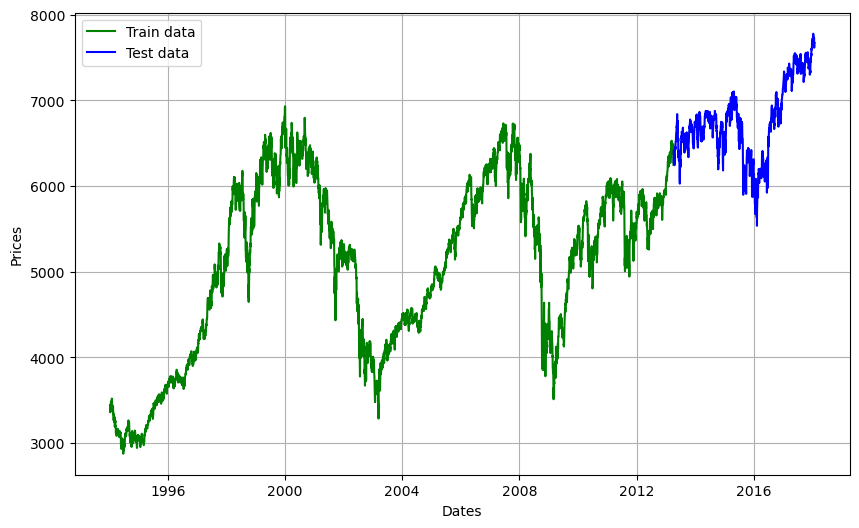

In [33]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data.ftse, 'green', label='Train data')
plt.plot(test_data.ftse, 'blue', label='Test data')
plt.legend()
plt.show()

In [34]:
test_data

,ftse,ftse_diff
date,,
2013-04-08,6276.940000,27.170000
2013-04-09,6313.200000,36.260000
2013-04-10,6387.370000,74.170000
2013-04-11,6416.140000,28.770000
2013-04-12,6384.390000,-31.750000
...,...,...
2018-01-23,7731.827774,16.386240
2018-01-24,7643.428966,-88.398808
2018-01-25,7615.839954,-27.589012


In [28]:
start='2013-04-08'
end='2014-01-29'

In [30]:
df_pred=result_arma32.predict(start=start,end=end)

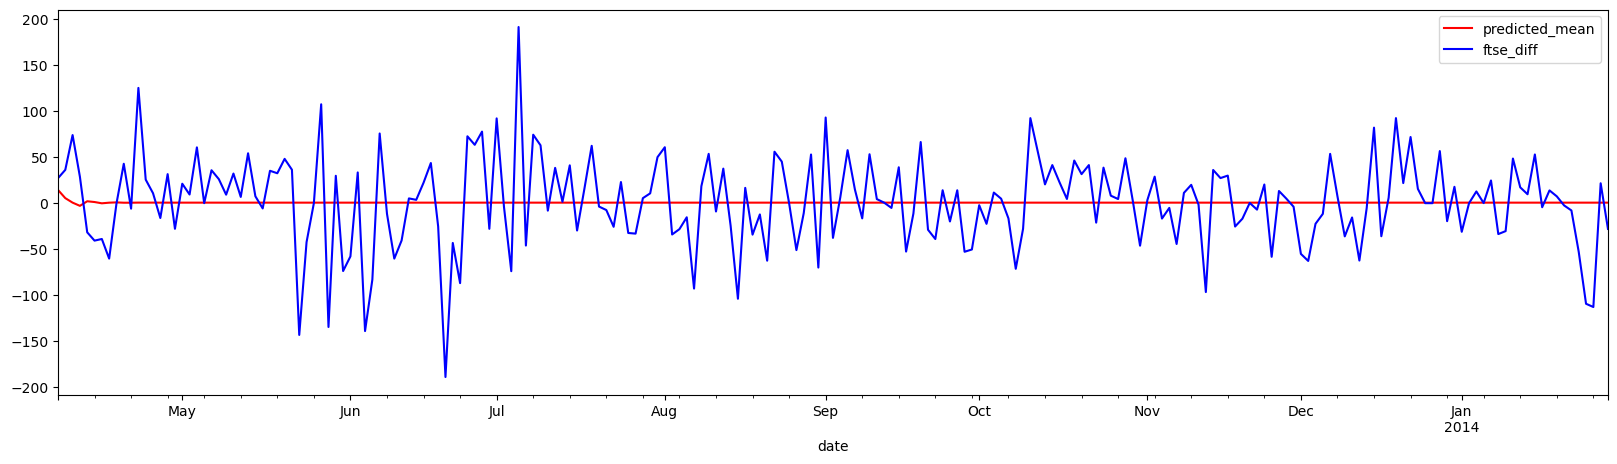

In [31]:
plt.grid(True)
df_pred.plot(figsize=(20,5),c='r')

test_data.ftse_diff[start:end].plot(figsize=(20,5),c='b')
plt.legend()
plt.show()

In [23]:
df_pred.head(40)

2013-04-08    14.437349
2013-04-09     5.477247
2013-04-10     0.568634
2013-04-11    -2.909917
2013-04-12     2.064691
2013-04-15     1.239131
2013-04-16    -0.158422
2013-04-17     0.530404
2013-04-18     0.833311
2013-04-19     0.489327
2013-04-22     0.486143
2013-04-23     0.611079
2013-04-24     0.573968
2013-04-25     0.540249
2013-04-26     0.563983
2013-04-29     0.568873
2013-04-30     0.558809
2013-05-01     0.560130
2013-05-02     0.563357
2013-05-03     0.561891
2013-05-06     0.561176
2013-05-07     0.561924
2013-05-08     0.561953
2013-05-09     0.561674
2013-05-10     0.561749
2013-05-13     0.561827
2013-05-14     0.561776
2013-05-15     0.561763
2013-05-16     0.561785
2013-05-17     0.561783
2013-05-20     0.561776
2013-05-21     0.561779
2013-05-22     0.561781
2013-05-23     0.561779
2013-05-24     0.561779
2013-05-27     0.561780
2013-05-28     0.561779
2013-05-29     0.561779
2013-05-30     0.561779
2013-05-31     0.561779
Freq: B, Name: predicted_mean, dtype: fl

In [32]:
# invert differenced value
def inverse_difference(df_test, df_pred, interval=1):
	return df_pred + df_test[-interval]

In [26]:
test_data.ftse[start:end]

date
2013-04-08    6276.940000
2013-04-09    6313.200000
2013-04-10    6387.370000
2013-04-11    6416.140000
2013-04-12    6384.390000
                 ...     
2014-01-23    6773.281750
2014-01-24    6663.741670
2014-01-27    6550.659382
2014-01-28    6572.327978
2014-01-29    6544.278589
Freq: B, Name: ftse, Length: 213, dtype: float64

In [33]:
df_pred_inv=inverse_difference(test_data.ftse[start:end],df_pred)

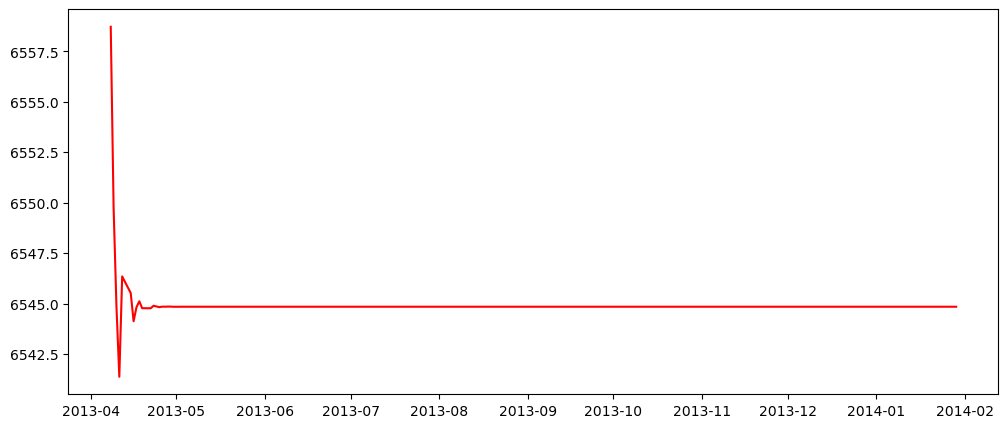

In [34]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_pred_inv,c='r')
plt.show()

In [35]:
history = [x for x in train_data.ftse_diff]
len(history)

5020

In [57]:
type(history)

list

In [ ]:
#predict just one next step

#history = [x for x in df_train.ftse]
predictedARIMA= list()
for t in range(len(test_data.ftse_diff[start:end])): 
   model_ar32= sm.tsa.arima.ARIMA(history, order=(3,0,2))
   result_ar32 = model_ar32.fit()
   #just forecast one record 
   output = result_ar32.forecast()
   
   yhat = output[0]
   predictedARIMA.append(yhat)
   #insert on testdata to train set
   obs = test_data.ftse_diff[t]
   history.append(obs)

In [ ]:
predictedARIMA=pd.DataFrame(predictedARIMA,index=test_data[start:end].index)

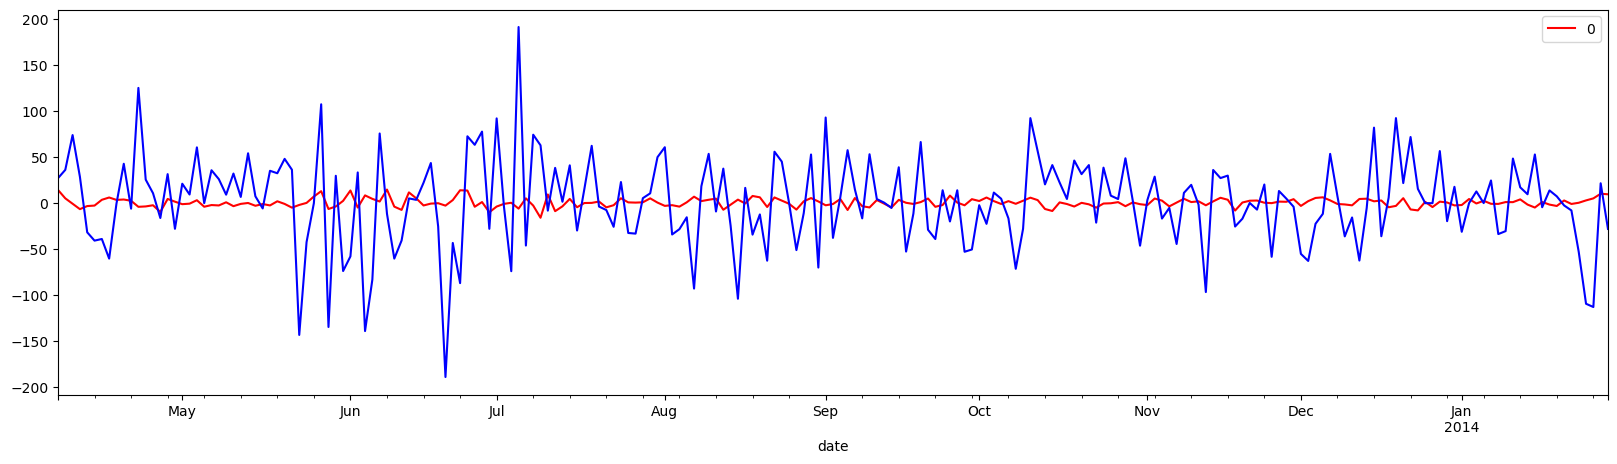

In [34]:
predictedARIMA.plot(figsize=(20,5),c='r')
test_data.ftse_diff[start:end].plot(figsize=(20,5),c='b')

plt.show()

### validationMetrics

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [39]:
def root_mean_squared_error(y_true, y_pred): 
    mse=mean_squared_error(y_true,y_pred)
    rmse=np.sqrt(mse)

    return rmse

In [37]:
def validation_metrics(y_true,y_pred):
  r2=r2_score(y_true,y_pred)
  mse=mean_squared_error(y_true,y_pred)
  rmse=root_mean_squared_error(y_true,y_pred)
  mae=mean_absolute_error(y_true,y_pred)

  return print('r2= '+str(r2),' mse= '+str(mse),' rmse= '+str(rmse),' mae= '+str(mae))

In [40]:
validation_metrics(test_data.ftse_diff[start:end],predictedARIMA)

r2= -0.02968317713844426  mse= 2491.947692202317  rmse= 49.91941197772984  mae= 37.12238272881055


### ARIMA

In [ ]:
train_data



In [43]:
model_arima32=sm.tsa.arima.ARIMA(train_data.ftse,order=(3,1,2))
result_arima32=model_arima32.fit()
result_arima32.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -27587.161
Date:                Fri, 27 Jan 2023   AIC                          55186.323
Time:                        15:00:14   BIC                          55225.448
Sample:                    01-10-1994   HQIC                         55200.033
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5674      0.080     -7.130      0.000      -0.723      -0.411
ar.L2         -0.4416      0.088     -5.030      0.000      -0.614      -0.270
ar.L3         -0.0938      0.010     -9.540      0.000      -0.113      -0.075
ma.L1          0.5491      0.080      6.860      0.000       0.392       0.706
ma.L2          0.3854      0.088      4.362      0.000       0.212       0.559
sigma2      3484.5738     42.019     82.929      0.000    3402.218    3566.929
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2995.39
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
resid=result_arima32.resid

In [45]:
re32=pd.DataFrame(resid)

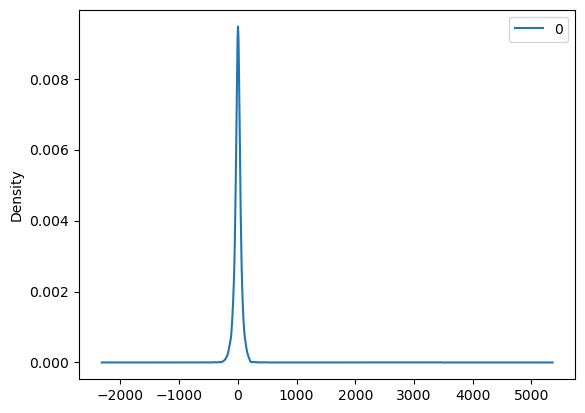

In [46]:
re32.plot(kind='kde')
plt.show()

In [47]:
model_arima32=sm.tsa.arima.ARIMA(train_data.ftse,order=(3,1,3))
result_arima32=model_arima32.fit()
result_arima32.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -27583.404
Date:                Fri, 27 Jan 2023   AIC                          55180.808
Time:                        15:02:35   BIC                          55226.455
Sample:                    01-10-1994   HQIC                         55196.804
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1762      0.086     -2.054      0.040      -0.344      -0.008
ar.L2         -0.2433      0.074     -3.284      0.001      -0.389      -0.098
ar.L3          0.3994      0.081      4.948      0.000       0.241       0.558
ma.L1          0.1580      0.081      1.944      0.052      -0.001       0.317
ma.L2          0.1831      0.071      2.564      0.010       0.043       0.323
ma.L3         -0.4860      0.076     -6.405      0.000      -0.635      -0.337
sigma2      3482.1960     42.174     82.568      0.000    3399.537    3564.855
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3110.86
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### bestModel

In [51]:
model_arima52=sm.tsa.arima.ARIMA(train_data.ftse,order=(5,1,2))
result_arima52=model_arima52.fit()
result_arima52.summary()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -27580.496
Date:                Fri, 27 Jan 2023   AIC                          55176.993
Time:                        15:08:15   BIC                          55229.161
Sample:                    01-10-1994   HQIC                         55195.273
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4302      0.117      3.684      0.000       0.201       0.659
ar.L2         -0.4519      0.123     -3.684      0.000      -0.692      -0.211
ar.L3         -0.0587      0.013     -4.522      0.000      -0.084      -0.033
ar.L4          0.0393      0.012      3.147      0.002       0.015       0.064
ar.L5         -0.0871      0.011     -8.047      0.000      -0.108      -0.066
ma.L1         -0.4507      0.117     -3.854      0.000      -0.680      -0.222
ma.L2          0.4092      0.124      3.304      0.001       0.166       0.652
sigma2      3475.9740     42.134     82.498      0.000    3393.393    3558.555
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2987.80
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
model_arima23=sm.tsa.arima.ARIMA(train_data.ftse,order=(2,1,3))
result_arima23=model_arima23.fit()
result_arima23.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -27586.318
Date:                Fri, 27 Jan 2023   AIC                          55184.636
Time:                        16:35:44   BIC                          55223.762
Sample:                    01-10-1994   HQIC                         55198.347
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4665      0.082     -5.686      0.000      -0.627      -0.306
ar.L2         -0.3300      0.090     -3.657      0.000      -0.507      -0.153
ma.L1          0.4465      0.082      5.476      0.000       0.287       0.606
ma.L2          0.2699      0.090      3.000      0.003       0.094       0.446
ma.L3         -0.0982      0.010    -10.012      0.000      -0.117      -0.079
sigma2      3483.3991     41.992     82.955      0.000    3401.097    3565.701
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2983.91
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model_arima52=sm.tsa.arima.ARIMA(train_data.ftse,order=(5,1,3))
result_arima52=model_arima52.fit()
result_arima52.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -27579.709
Date:                Fri, 27 Jan 2023   AIC                          55177.418
Time:                        15:08:49   BIC                          55236.107
Sample:                    01-10-1994   HQIC                         55197.983
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4321      0.106      4.059      0.000       0.223       0.641
ar.L2         -0.6003      0.100     -5.990      0.000      -0.797      -0.404
ar.L3          0.1047      0.098      1.071      0.284      -0.087       0.296
ar.L4          0.0304      0.013      2.383      0.017       0.005       0.055
ar.L5         -0.0805      0.013     -6.382      0.000      -0.105      -0.056
ma.L1         -0.4533      0.106     -4.267      0.000      -0.662      -0.245
ma.L2          0.5592      0.101      5.526      0.000       0.361       0.758
ma.L3         -0.1674      0.095     -1.768      0.077      -0.353       0.018
sigma2      3477.0523     42.553     81.712      0.000    3393.651    3560.454
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3040.80
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model_arima62=sm.tsa.arima.ARIMA(train_data.ftse,order=(6,1,2))
result_arima62=model_arima62.fit()
result_arima62.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(6, 1, 2)   Log Likelihood              -27579.862
Date:                Fri, 27 Jan 2023   AIC                          55177.723
Time:                        15:10:24   BIC                          55236.412
Sample:                    01-10-1994   HQIC                         55198.289
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1498      0.202      0.742      0.458      -0.246       0.545
ar.L2         -0.4303      0.152     -2.823      0.005      -0.729      -0.132
ar.L3         -0.0737      0.014     -5.089      0.000      -0.102      -0.045
ar.L4          0.0171      0.015      1.151      0.250      -0.012       0.046
ar.L5         -0.0715      0.017     -4.160      0.000      -0.105      -0.038
ar.L6         -0.0251      0.017     -1.454      0.146      -0.059       0.009
ma.L1         -0.1708      0.201     -0.851      0.395      -0.564       0.223
ma.L2          0.3829      0.155      2.474      0.013       0.080       0.686
sigma2      3472.1497     42.034     82.604      0.000    3389.765    3554.534
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3023.27
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#evaluation with arima

In [54]:
df_pred52=result_arima52.predict(start=start,end=end)

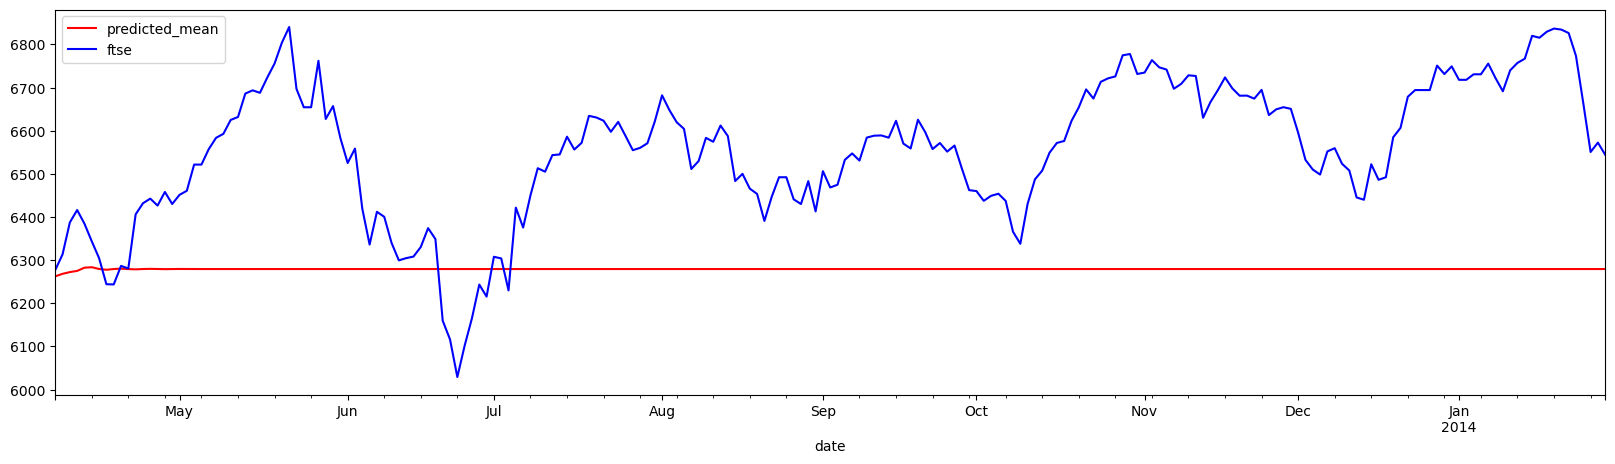

In [55]:
plt.grid(True)
df_pred52.plot(figsize=(20,5),c='r')

test_data.ftse[start:end].plot(figsize=(20,5),c='b')
plt.legend()
plt.show()

In [56]:
history = [x for x in train_data.ftse]
len(history)

5020

In [61]:
#predict just one next step

#history = [x for x in df_train.ftse]
predictedARIMA= list()
for t in range(len(test_data.ftse[start:end])): 
   model_ar52= sm.tsa.arima.ARIMA(history, order=(5,1,2))
   result_ar52 = model_ar52.fit()
   #just forecast one record 
   output = result_ar52.forecast()
   
   yhat = output[0]
   predictedARIMA.append(yhat)
   #insert on testdata to train set
   obs = test_data.ftse[t]
   history.append(obs)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [74]:
#predict just one next step

#history = [x for x in df_train.ftse]
predictedARIMA23= list()
for t in range(len(test_data.ftse[start:end])): 
   model_ar23= sm.tsa.arima.ARIMA(history, order=(2,1,3))
   result_ar23 = model_ar23.fit()
   #just forecast one record 
   output = result_ar23.forecast()
   
   yhat = output[0]
   predictedARIMA23.append(yhat)
   #insert on testdata to train set
   obs = test_data.ftse[t]
   history.append(obs)

In [62]:
predictedARIMA52=pd.DataFrame(predictedARIMA,index=test_data[start:end].index)

In [77]:
predictedARIMA23=pd.DataFrame(predictedARIMA23,index=test_data[start:end].index)

In [78]:
predictedARIMA23

,0
date,
2013-04-08,6545.849103
2013-04-09,6278.698668
2013-04-10,6311.741381
2013-04-11,6389.011685
2013-04-12,6418.047098
...,...
2014-01-23,6826.124158
2014-01-24,6773.297282
2014-01-27,6663.727159


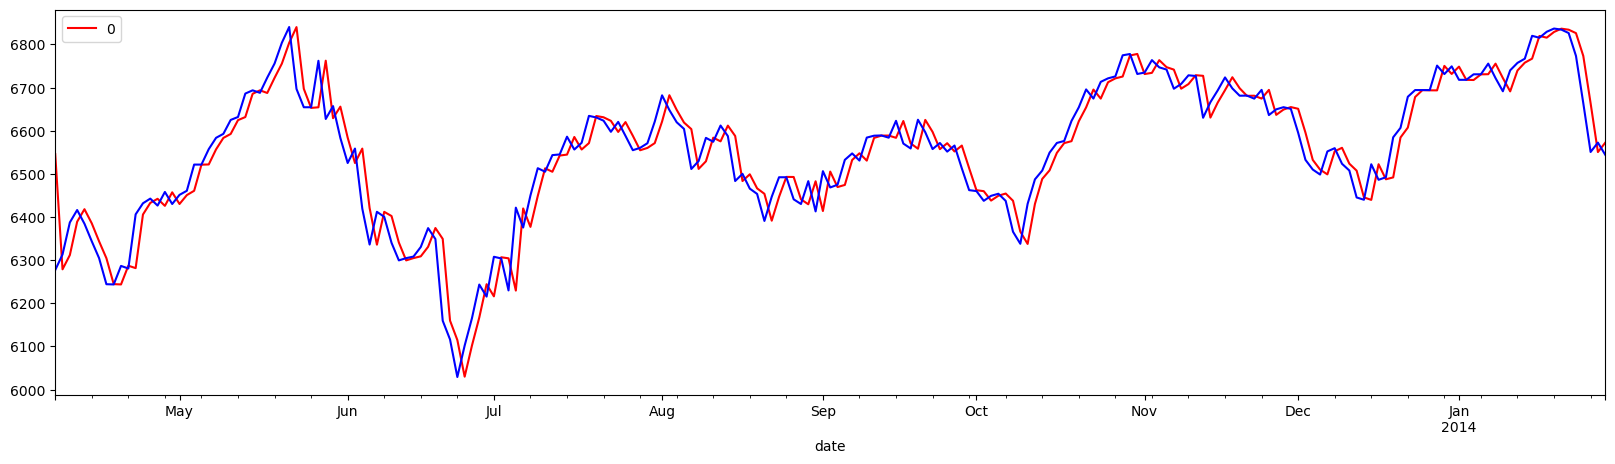

In [79]:
predictedARIMA23.plot(figsize=(20,5),c='r')
test_data.ftse[start:end].plot(figsize=(20,5),c='b')

plt.show()

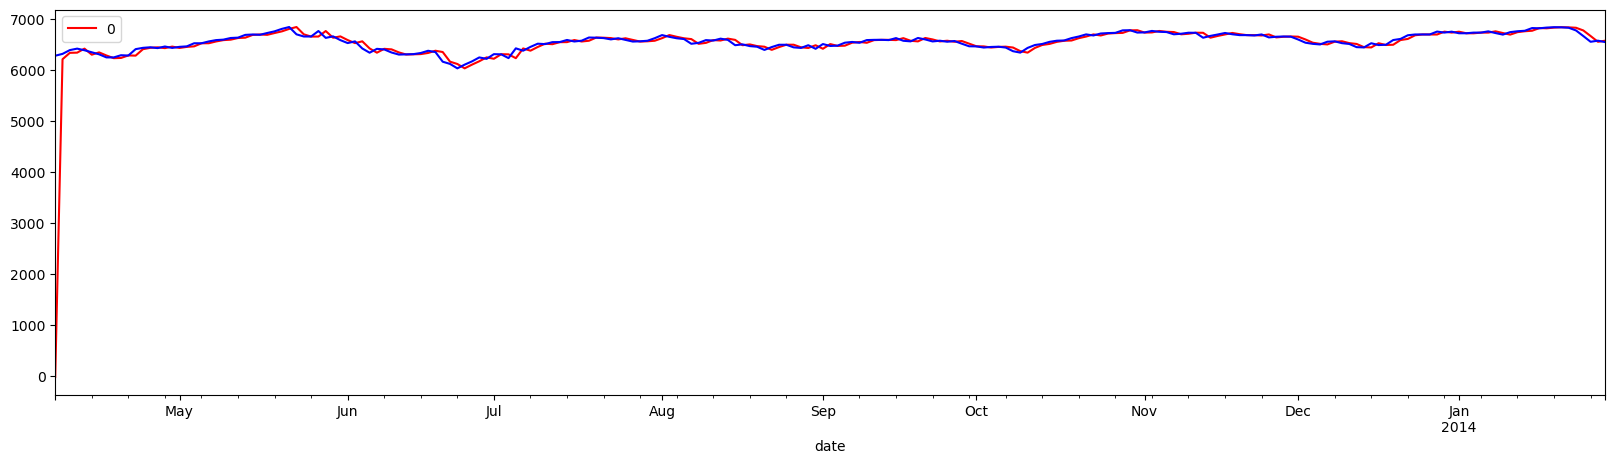

In [63]:
predictedARIMA52.plot(figsize=(20,5),c='r')
test_data.ftse[start:end].plot(figsize=(20,5),c='b')

plt.show()

In [64]:
validation_metrics(test_data.ftse[start:end],predictedARIMA52)

r2= -6.647933910791935  mse= 189184.38621636335  rmse= 434.9533149849112  mae= 66.58363534203723


In [80]:
validation_metrics(test_data.ftse[start:end],predictedARIMA23)

r2= 0.888412874114487  mse= 2760.2934552703105  rmse= 52.53849498482337  mae= 37.71227499332255
